# Homework 6 RF Accuracy Improvement

This assignment is inspired by examples of Shan-Hung Wu from National Tsing Hua University.

Requirement: improve the accuracy per feature of the following code from 0.03 up to at least 0.40 and accuracy should be more than 0.92

Here are three hints:

    You can improve the ratio by picking out or "creating" several features.
    Tune hyperparameters
    The ratio can be improved from 0.03 up to 0.47.

worst concave points       0.161445
worst area                 0.120899
mean concave points        0.120143
worst perimeter            0.112272
worst radius               0.080207
mean perimeter             0.072500
mean concavity             0.051511
mean radius                0.040403
worst compactness          0.024390
area error                 0.024337
mean area                  0.023027
worst concavity            0.021521
perimeter error            0.016729
radius error               0.015361
mean texture               0.012707
worst texture              0.012180
mean compactness           0.012127
concave points error       0.010385
worst symmetry             0.009379
worst smoothness           0.009322
worst fractal dimension    0.008901
mean smoothness            0.007962
symmetry error             0.005607
concavity error            0.004837
compactness error          0.004794
smoothness error           0.004482
fractal dimension error    0.003747
mean fractal dimension     0

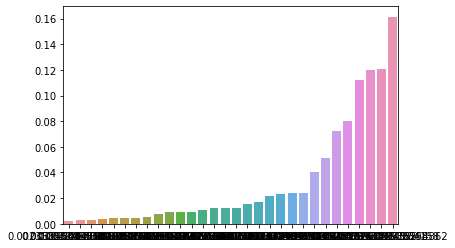

Cross-Validations on Original Model: [0.92105263 0.92982456 0.98245614 0.97368421 0.98230088]
CV Mean 0.9578636857630801

Cross-Validations on New Model [0.92982456 0.95614035 0.98245614 0.95614035 0.97345133]
CV Mean 0.95960254618848

Accuracy on Original Model: 0.9590643274853801

Limited Feature Accuracy: 0.9590643274853801

Original Model - accuracy/numFeatures:  0.031968810916179334

Limited Features Model - accuracy/numFeatures:  0.47953216374269003



In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

# load the breast_cancer dataset
init_data = load_breast_cancer()
(X, y) = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

forest = RandomForestClassifier(n_estimators=100)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

# TODO Select some features (X), hint: based on the connections with
# our Y (importance? correlation?)

feature_imp = pd.Series(importances,index=init_data.feature_names).sort_values(ascending=False)

print(feature_imp)

sns.barplot(x=feature_imp.index, y=feature_imp.values, data=feature_imp)

plt.show()

#Here we see that two features are much more important than the others.
#Worst Concave Points and Mean Concave Points
#In this block we select the two most important features and build another claassifier
n_features = 2

selector = SelectFromModel(estimator=forest, prefit=True, max_features=n_features)
important_features = selector.transform(X)

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(important_features, y, test_size=0.3, random_state=0)

new_forest = RandomForestClassifier(n_estimators=100)
new_forest.fit(new_X_train, new_y_train)

# TODO need 5 fold cross validation
cur_score = cross_val_score(forest, X, y, cv=5)

print("Cross-Validations on Original Model:", cur_score)
print("CV Mean", cur_score.mean())
print()#Formatting

new_cur_score = cross_val_score(new_forest, X, y, cv=5)
print("Cross-Validations on New Model", new_cur_score)
print("CV Mean", new_cur_score.mean())
print()#Formatting

# TODO Tune parameters for RandomForestClassifier


# TODO Calculate Average accuracy score
test_predictions = forest.predict(X_test)

print("Accuracy on Original Model:",accuracy_score(y_test, test_predictions))
print()#Formatting

limited_feature_test = new_forest.predict(new_X_test)

print("Limited Feature Accuracy:",accuracy_score(new_y_test, limited_feature_test))
print()#Formatting

#TODO Calculate Average (accuracy score/number of features)
print("Original Model - accuracy/numFeatures: ",(accuracy_score(y_test, test_predictions)/30.0))
print()#Formatting

print("Limited Features Model - accuracy/numFeatures: ",(accuracy_score(new_y_test, limited_feature_test)/n_features))
print()#Formatting